In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airpassengers/AirPassengers.csv


In [2]:
train=pd.read_csv("../input/airpassengers/AirPassengers.csv")

In [3]:
train.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')

In [5]:
data=pd.read_csv("../input/airpassengers/AirPassengers.csv",parse_dates=['Month'],index_col='Month',
                date_parser=dateparse)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
ts=data['#Passengers']

In [9]:
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [10]:
ts['1949-01-01']

112

In [11]:
from datetime import datetime

In [12]:
ts[datetime(1949,1,1)]

112

In [13]:
ts['1949-1-1':'1949-5-1']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
import matplotlib.pyplot as plt

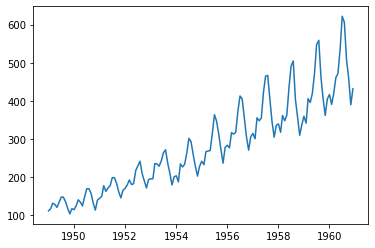

In [15]:
plt.plot(ts)

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='mean')
    std=plt.plot(rolstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    print("Result of Dickey Fuler Test:")
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','n_lags','p-value','nobs'])
    
    for key,value in dftest[4].items():
        
        dfoutput['Critical Values(%s)'%key]=value
    print (dfoutput) 
                                          
    

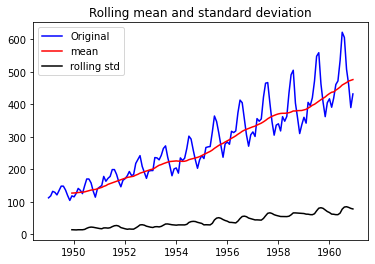

Result of Dickey Fuler Test:
Test Statistics           0.815369
n_lags                    0.991880
p-value                  13.000000
nobs                    130.000000
Critical Values(1%)      -3.481682
Critical Values(5%)      -2.884042
Critical Values(10%)     -2.578770
dtype: float64


In [17]:
test_stationary(ts)

In [18]:
ts_log=np.log(ts)

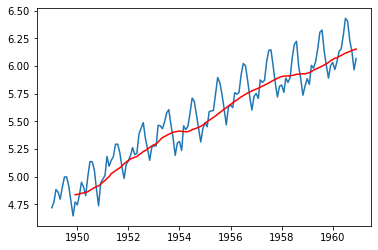

In [19]:
plt.plot(ts_log)
moving_average=ts_log.rolling(12).mean()
plt.plot(moving_average,color='red')

In [20]:
ts_log_moving_average_diff=ts_log-moving_average

In [21]:
ts_log_moving_average_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [22]:
ts_log_moving_average_diff.dropna(inplace=True)

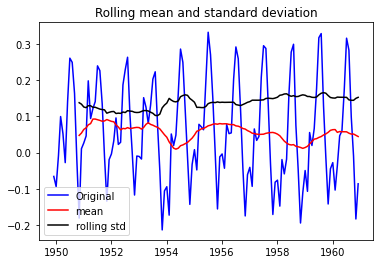

Result of Dickey Fuler Test:
Test Statistics          -3.162908
n_lags                    0.022235
p-value                  13.000000
nobs                    119.000000
Critical Values(1%)      -3.486535
Critical Values(5%)      -2.886151
Critical Values(10%)     -2.579896
dtype: float64


In [23]:
test_stationary(ts_log_moving_average_diff)

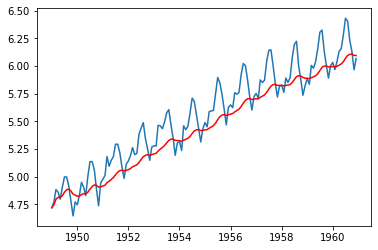

In [24]:
expweighted_avg=ts_log.ewm(12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg,color='red')

In [25]:
ts_log_ewma_diff=ts_log-expweighted_avg

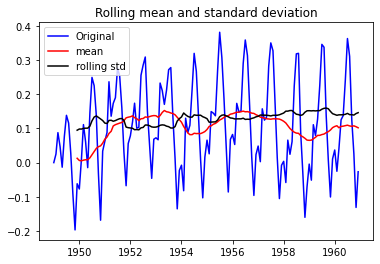

Result of Dickey Fuler Test:
Test Statistics          -3.566092
n_lags                    0.006443
p-value                  13.000000
nobs                    130.000000
Critical Values(1%)      -3.481682
Critical Values(5%)      -2.884042
Critical Values(10%)     -2.578770
dtype: float64


In [26]:
test_stationary(ts_log_ewma_diff)

In [27]:
ts_log_diff=ts_log-ts_log.shift()

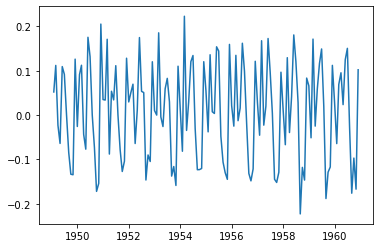

In [28]:
plt.plot(ts_log_diff)

In [29]:
ts_log_diff.dropna(inplace=True)

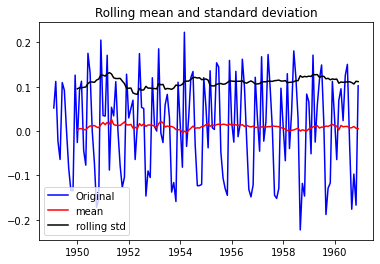

Result of Dickey Fuler Test:
Test Statistics          -2.717131
n_lags                    0.071121
p-value                  14.000000
nobs                    128.000000
Critical Values(1%)      -3.482501
Critical Values(5%)      -2.884398
Critical Values(10%)     -2.578960
dtype: float64


In [30]:
test_stationary(ts_log_diff)

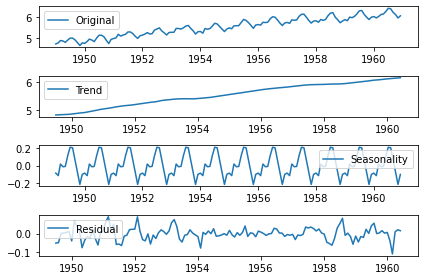

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

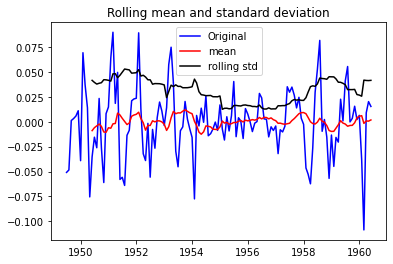

Result of Dickey Fuler Test:
Test Statistics        -6.332387e+00
n_lags                  2.885059e-08
p-value                 9.000000e+00
nobs                    1.220000e+02
Critical Values(1%)    -3.485122e+00
Critical Values(5%)    -2.885538e+00
Critical Values(10%)   -2.579569e+00
dtype: float64


In [32]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


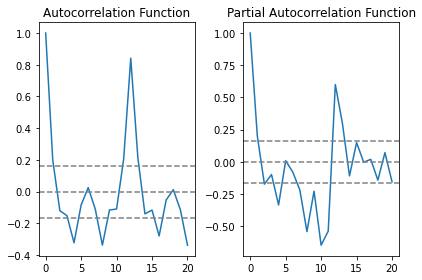

In [33]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

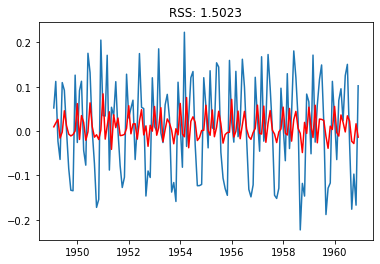

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts_log,order=(2,1,0))
results_ar=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ar.fittedvalues-ts_log_diff)**2))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


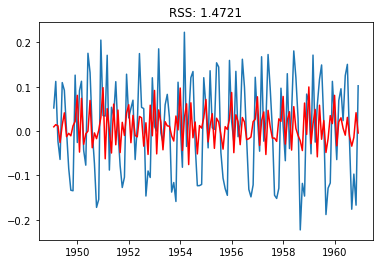

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts_log,order=(0,1,2))
results_ar=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ar.fittedvalues-ts_log_diff)**2))
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

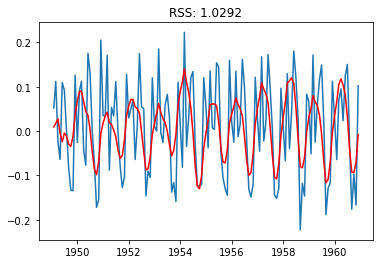

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts_log,order=(2,1,2))
results_ar=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ar.fittedvalues-ts_log_diff)**2))

In [37]:
predictions_ARIMA_diff=pd.Series(results_ar.fittedvalues,copy=True)

In [38]:
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [39]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()

In [40]:
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [41]:
predictions_arima_log=pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_arima_log=predictions_arima_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

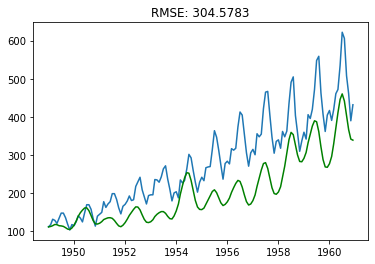

In [42]:
predictions_arima=np.exp(predictions_arima_log)
plt.plot(ts)
plt.plot(predictions_arima,color='green')
plt.title('RMSE: %.4f'% np.sqrt(pd.Series((results_ar.fittedvalues-ts)**2).sum()/len(ts)))
plt.show()